**В данном исследовании рассматривается список гипотез для увеличения выручки крупного интернет-магазина.
Основными задачами исследования являются : приоритизация гипотез, запуск A/B-теста и анализ результатов** 

### Приоритизация гипотез

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Прежде всего,  откроем файл и проведем предобработку данных.

In [ ]:
#импортируем необходимые в рамках исследования библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
data.info()
pd.set_option('display.max_colwidth', None)#полное отображение содержания строк
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Все данные имеют правильный формат, его менять не требуется. Также,  учитывая размер датафрейма (9 строк и 5 столбцов), можно изучить его визуально и сразу сделать вывод  об отсутствии пропусков и дубликатов в данных. Единственная необходимая предобработка - приведение названий столбцов к нижнему регистру методом str.lower():

In [ ]:
data.columns = data.columns.str.lower()
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для приоритезации гипотез воспользуемся фреймворками ICE и RICE: рассчитаем их для каждой гипотезы и поместим в соответствующий столбец датафрейма:

In [ ]:
#рассчет фреймворка ICE с округлением до десятых долей
data['ice'] = round(data['impact'] * data['confidence'] / data['efforts'],2)
#рассчет фреймворка RICE с округлением до десятых долей
data['rice'] = round(data['reach'] * data['impact'] * data['confidence'] / data['efforts'], 2)
data

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


Проанализируем приоритеты гипотез, отсортировав их по убыванию  значения фреймворка ICE методом sort_values():

In [ ]:
data.sort_values(by = 'ice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Без  учета параметра reach (скольких пользователей затронет изменение, которое мы хотим внести) наибольший приоритет имеют гипотезы № 8,0 и 7. Наименьший приоритет  - гипотеза №4.

Теперь проанализируем приоритеты гипотез, отсортировав их по убыванию  значения фреймворка RICE методом sort_values():

In [ ]:
data.sort_values(by = 'rice', ascending = False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


С учетом параметра reach (скольких пользователей затронет изменение, которое мы хотим внести) наибольший приоритет имеют гипотезы № 7,2,0 и 6, а самый низкий приоритет  - снова гипотеза №4.  Самой важной гипотезой с учетом охвата аудитории оказалась гипотеза №7. Параметр охвата аудитории является одним из  самых важных, т.к. чем больше аудитория, на которую может повлять гипотеза, тем больше вероятность увеличения выручки интернет-магазина, что является основной целью данного исследования,  поэтому на проверке гипотезы №7 стоит остановиться в первую очередь.

### Анализ А/В-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv
Для начала откроем эти файлы и изучим данные:

In [ ]:
try:
    orders = pd.read_csv('/datasets/orders.csv') #прочитаю файл 
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
orders.info()
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [ ]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv') #прочитаю файл 
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
visitors.info()
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В обоих датафреймах данные столбца с датой имеют формат object, для работы с датой необходио перевести данные этих столбцов в формат даты datetime методом pd.to_datetime():

In [ ]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Также переименуем названия двух столбцов датафрейма orders методом rename() для лучшей наглядности:

In [ ]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True)

Проверим наличие полных  дубликатов и пропущенных данных в обоих датафреймах:

In [ ]:
display(len(orders[orders.duplicated()]))#полных дубликатов нет
len(visitors[visitors.duplicated()])# полных дубликатов нет

0

0

In [ ]:
display(orders.isnull().sum())# пропусков нет
visitors.isnull().sum() # пропусков нет

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [ ]:
#Проверим результат изменений форматов данных и названий столбцов
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Стоит провести дополнительные исследования качества данных:
- сколько у нас групп в АВ-тесте;
- сколько пользователей в каждой группе - по таблице с заказами;
- найти минимальную и максимальную дату исследования;
- не попадают ли какие-то пользователи в обе группы - по таблице с заказами. Пересечение групп может повлиять на результаты анализа.

In [ ]:
display(orders['group'].value_counts()) #количество групп и пользователей в таблице с заказами
visitors['group'].value_counts() #количество групп и пользователей в таблице с визитами

B    640
A    557
Name: group, dtype: int64

A    31
B    31
Name: group, dtype: int64

В каждой таблице рассматривается 2 группы пользователей - А и В, в группе А таблицы с заказами 557 человек,  в группе В - 640, то есть трафик поделен неравномерно. В таблице visitors также 2 группы А и В с равномерным распределением по 31 человек.

In [ ]:
display(orders['date'].min()) #начальная дата теста
display(orders['date'].max()) #конечная дата теста

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Тест проводился 1 месяц - весь август 2019 года

In [ ]:
visitors_a  = set(orders[orders['group'] == 'A']['visitor_id'].unique()) #уникальные участники группы А
visitors_b = set(orders[orders['group'] == 'B']['visitor_id'].unique()) #уникальные участники группы Б
visitors_ab = visitors_a.intersection(visitors_b)# пересечение пользователей - участников обеих групп
len(visitors_ab) #их колличество

58

58 пользователей присутсвуют в обеих группах,  для улучшения качества теста их  следует удалить

In [ ]:
orders = orders[~orders["visitor_id"].isin(visitors_ab)] #удаляем перескающихся участников обеих групп

**Данные готовы к анализу A/B-теста.  Для начала построим график кумулятивной выручки по группам. Для этого создадим массив уникальных пар значений дат и групп теста и соберём агрегированные кумулятивные по дням данные о заказах в несколько действий**

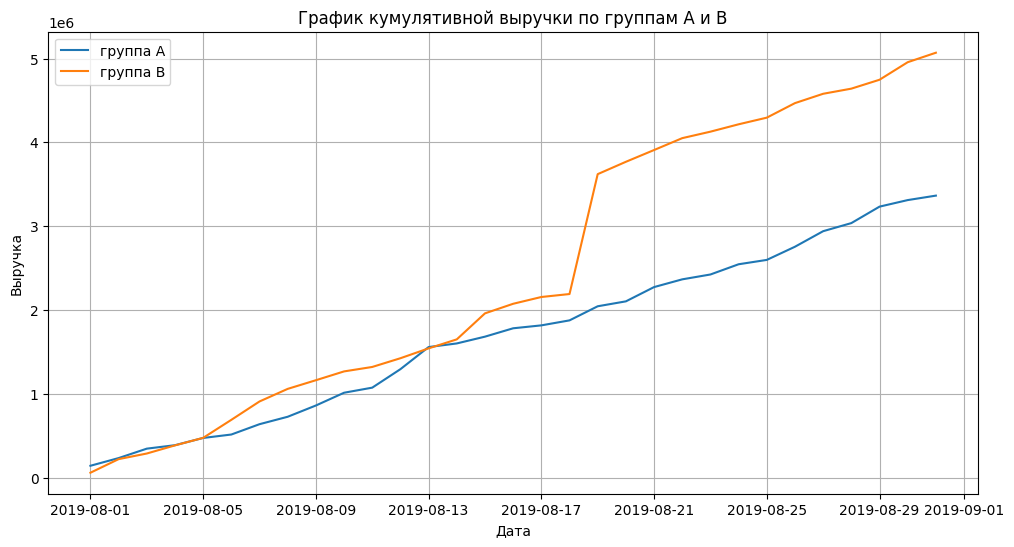

In [ ]:
#Создаем датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные данные о заказах по дням 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим графики выручки групп А и В
plt.figure(figsize=(12,6)) #задаем размер графика
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='группа B')
plt.ylabel('Выручка') #название оси Y
plt.xlabel('Дата') #название оси X
plt.title('График кумулятивной выручки по группам A и B') #название графика
plt.grid() #добавляем сетку для наглядности
plt.legend() #подписи графиков  - групп А и В
plt.show()

Выручка  увеличивается в течение всего теста в обоих группах. Выручка группы А растет более плавно.
Согласно данным графиков,  практически все время исследования (с 1 по 31 августа) выручка группы В была выше выручки группы А. До 5 августа группы показывали схожую динамику выручки. Одинаковые значения наблюдаются только  5 и 13 августа. 18 августа произошел резкий рост выручки группы В, который продолжился и далее,  что может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке

**Далее построим график кумулятивного среднего чека по группам, для этого разделим кумулятивную выручку на кумулятивное число заказов:**

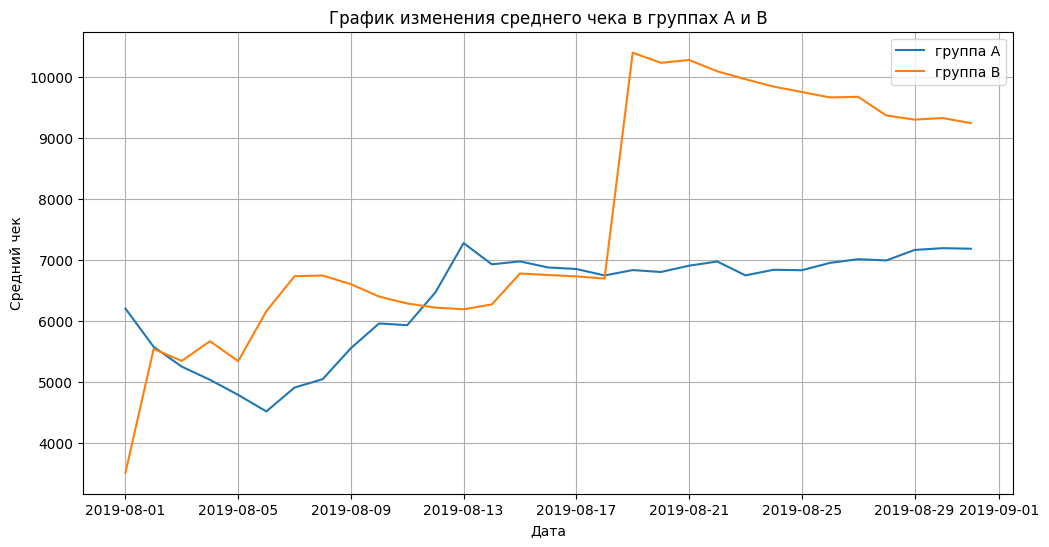

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='группа B')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График изменения среднего чека в группах A и B')
plt.grid()
plt.legend()
plt.show()

График среднего чека группы В показывает лучшую динамику роста,  чем график среднего чека группы А. 
За все время теста только несколько дней (предположительно 1, 11,12,13 и 14 августа) средний чек группы А превышал средний чек группы В. После 13 августа средний чек группы А остается примерно на том же уровне. В группе В снова наблюдается резкий рост 18 августа, что также говорит о наличии аномалии в данных (вероятно заказа(-ов) с очень большой суммой)

**Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline() (от англ. horizontal line across the axis*, «горизонтальная линия поперек оси»):**

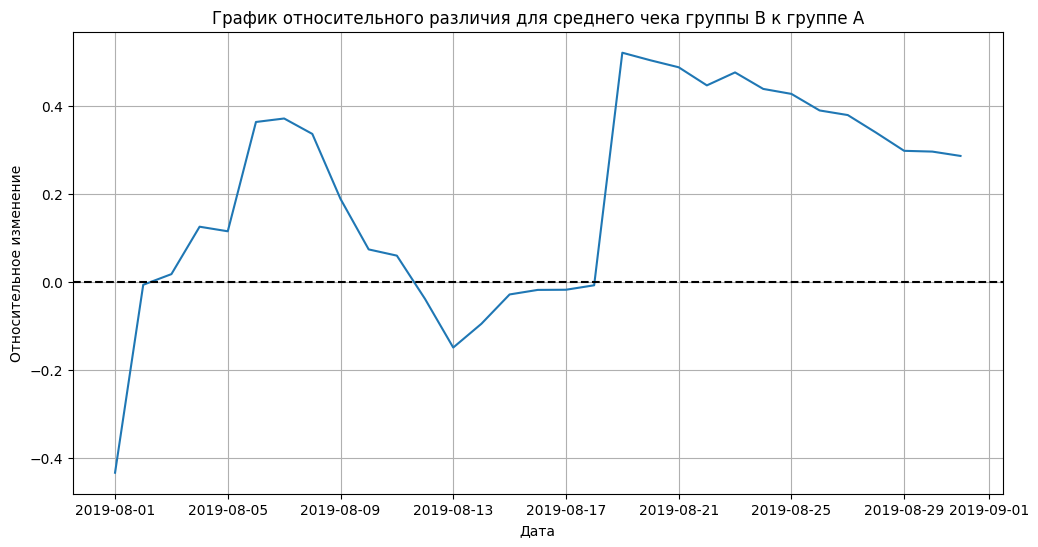

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Относительное изменение')
plt.xlabel('Дата')
plt.title('График относительного различия для среднего чека группы В к группе А')
plt.grid()
plt.show()

В нескольких точках график различия между группами А и В резко «скачет»: резко растет с начала теста, далее 7 августа - резко падает,  18 августа - снова резко растет. Это также свидетельствует о неоднородности данных. 

**Построим график кумулятивного среднего количества заказов на посетителя по группам**

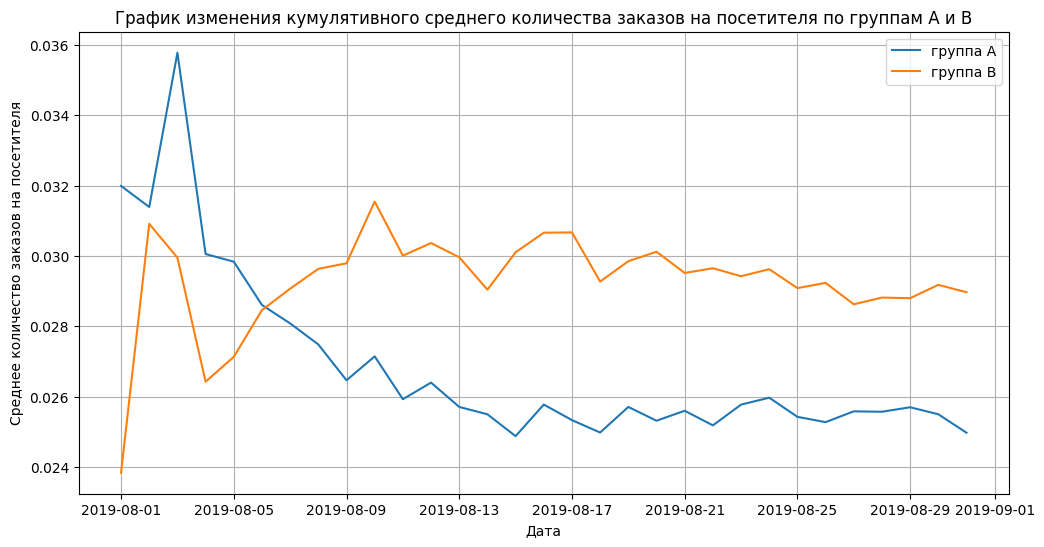

In [ ]:
# считаем среднее количество заказов на посетителя
cumulativeData['mean_orders'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['mean_orders'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['mean_orders'], label='группа B')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xlabel('Дата')
plt.title('График изменения кумулятивного среднего количества заказов на посетителя по группам А и В')
plt.grid()
plt.legend()
plt.show()

В начале теста обе группы демонстрировали схожую динамику,  причем группа А лидировала на протяжении 4 дней теста. Однако 6 августа произошел резкий рост кумулятивного среднего количества заказов на посетителя в группе В при аналогичном падении в группе А,  после чего графики постепенно выравниваются на уровне 0,029 (группа В) и 0,025 (группа А) и группа В значительно опережает группу А до конца теста

**Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

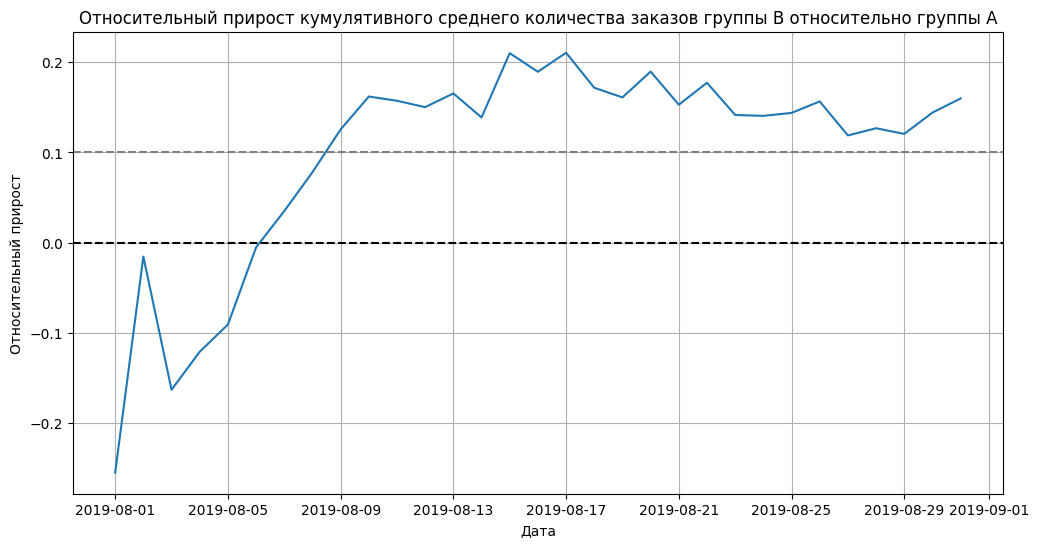

In [ ]:
mergedCumulative_mean_orders = cumulativeDataA[['date','mean_orders']].merge(cumulativeDataB[['date','mean_orders']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12,6))
plt.plot(mergedCumulative_mean_orders['date'], mergedCumulative_mean_orders['mean_ordersB']/mergedCumulative_mean_orders['mean_ordersA']-1)
plt.ylabel('Относительный прирост')
plt.xlabel('Дата')
plt.title('Относительный прирост кумулятивного среднего количества заказов группы B относительно группы A')
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.show()

Согласно данным графика, до 6 августа прирост был отрицательным,  то есть лидировала группа А, однако далее произошел резкий рост группы В с пиковым значением на уровне 20%, а  относительный прирост кумулятивного среднего количества заказов на посетителя  группы B относительно группы A к концу теста составляет примерно 14%. Несмотря на очевидное лидерство группы В по многим параметрам, сейчас делать какие-либо выводы по тесту нельзя. Сперва стоит проанализировать аномалии, возможно, они изменят картину

**Для этого построим точечный график количества заказов по пользователям. Создадим датафрейм ordersByUsers с количеством заказов для каждого пользователя. Метод .groupby('...', as_index=False) сгруппирует заказы по пользователям, метод .agg({'...' : 'nunique',}) подсчитает число уникальных заказов по сгруппированным данным**

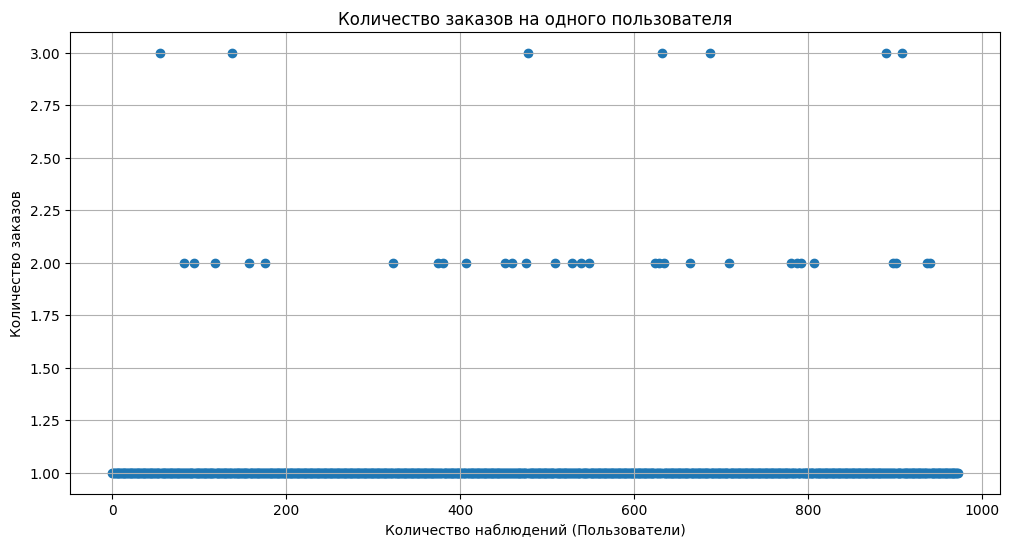

In [ ]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
ordersByUsers.columns = ['user_id', 'orders']
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(12,6))
plt.ylabel('Количество заказов')
plt.xlabel('Количество наблюдений (Пользователи)')
plt.title('Количество заказов на одного пользователя')
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

Большинство пользователей совершают 1 заказ, также достаточно большое количество юзеров совершают 2 заказа. 3 заказа оставяет минимальное количество пользователей
**Чтобы более точно выбрать границу для определения аномальных пользователей, посчитаем 95-й и 99-й перцентили количества заказов на пользователя методом np.percentile()**

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали более 2 заказов, и не более 1% - больше 4х заказов. Соответственно,  можно считать,  что аномалиями являются пользователи, сделавшие больше 2х заказов.

**По аналогии проанализируем точечный график стоимостей заказов пользователей**

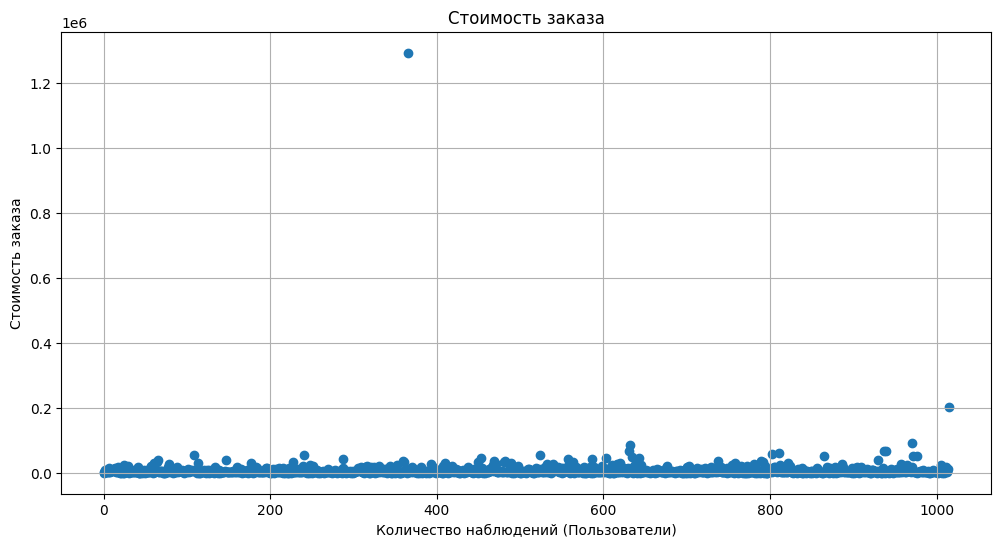

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.ylabel('Стоимость заказа')
plt.xlabel('Количество наблюдений (Пользователи)')
plt.title('Стоимость заказа')
plt.grid()
plt.scatter(x_values, orders['revenue']) 
plt.show()

Большинство бользователей совершают заказы стоимостью не более 50000р, также встречаются выбросы на уровне 100-200т.р., максимум наблюдается у 1 пользователя - заказ со стоимостью  более 1,2 млнр. **Чтобы более точно выбрать границу для определения аномальных данных, посчитаем 95-й и 99-й перцентили количества заказов на пользователя методом np.percentile()**

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% пользователей осуществлял заказ дороже 26 785р, и не более 1% - больше 53 904р. Соответственно, можно считать, что аномалиями являются пользователи, делавшие заказы дороже 26 785р.

**Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**
**Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть**

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['transaction_id', 'visitor_id'], где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. 
Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 
Посчитаем статистическую значимость различия среднего количества заказов по результатам теста. Применим тест Манна-Уитни. 
Выведем p-value для сравнения среднего между группами. Округлим p-value до 5 знаков после запятой. 
Вычислим и выведем относительное различие в среднем между группами. Округлим результат до 5 знаков после запятой

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
alpha = 0.05 #Статистический уровень значимости

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.5f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01102
0.15980


Вывод: По «сырым» данным различия в среднем числе заказов групп A и B есть. 
Первое число — p-value = 0.01102 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 15.9% — второе число в выводе.

**Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами:**

In [ ]:
alpha = 0.05 #Статистический уровень значимости
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.829
0.287


Вывод: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B выше среднего чека группы A примено на 28,7%


**Теперь посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Также сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть**


Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 26785 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и  5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 26785 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 
Узнаем, сколько всего аномальных пользователей атрибутом shape

In [ ]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['transaction_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.shape[0]

58

Получилось 58 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. 
Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [ ]:
alpha = 0.05
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.008
0.185


По сравнению с результатами теста по "сырым данным"  - 0.011 и 0.159 соответственно,  изменения есть,  но они не меняют предыдущих  выводов: статистически значимые различия в среднем числе заказов между группами есть. Относительный выигрыш группы B увеличился до  18,5%.

**По аналогии проанализируем изменения по среднему чеку на основе очищенных данных. Сформулируем гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть**

In [ ]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.716
0.287


По сравнению с результатами теста по "сырым данным" - 0.829 и 0.287 соответственно, изменения есть, но они также не меняют предыдущих выводов: причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия между группами, нет. После очистки данных средний чек группы B  стал выше среднего чека группы A примено на 28,7%, что также является высоким показателем.

### Выводы по результатам теста

В данном исследовании рассматривался список гипотез для увеличения выручки крупного интернет-магазина. Основными задачами исследования являлись : приоритизация гипотез, запуск A/B-теста и анализ его результатов

1. Приоритизация гипотез. С учетом параметра reach (скольких пользователей затронет изменение, которое мы хотим внести) наибольший приоритет имеют гипотезы № 7,2,0 и 6, а самый низкий приоритет - снова гипотеза №4. Самой важной гипотезой с учетом охвата аудитории оказалась гипотеза №7. Параметр охвата аудитории является одним из самых важных, т.к. чем больше аудитория, на которую может повлять гипотеза, тем больше вероятность увеличения выручки интернет-магазина, что является основной целью данного исследования, поэтому на проверке гипотезы №7 стоит остановиться в первую очередь;
2. Промежуточные результаты А/В-теста:
- Выручка увеличивается в течение всего теста в обоих группах. Выручка группы А растет более плавно. Согласно данным графиков, **практически все время исследования (с 1 по 31 августа) выручка группы В была выше выручки группы А**. До 5 августа группы показывали схожую динамику выручки. Одинаковые значения наблюдаются только 5 и 13 августа. 18 августа произошел резкий рост выручки группы В, который продолжился и далее
- **График среднего чека группы В показывает лучшую динамику роста, чем график среднего чека группы А**. За все время теста только несколько дней (предположительно 1, 11,12,13 и 14 августа) средний чек группы А превышал средний чек группы В. После 13 августа средний чек группы А остается примерно на том же уровне. В группе В снова наблюдается резкий рост 18 августа
- В начале теста обе группы демонстрировали схожую динамику изменения среднего количества заказов, причем группа А лидировала на протяжении 4 дней теста. Однако 6 августа произошел резкий рост кумулятивного среднего количества заказов на посетителя в группе В при аналогичном падении в группе А, после чего графики постепенно выравниваются на уровне 0,029 (группа В) и 0,025 (группа А) и **группа В значительно опережает группу А до конца теста**
- Согласно посчитанным параметрам статистической значимости различий в среднем количестве заказов и среднем чеке на посетителя между группами по «сырым» и очищенным» данным было установлено, что: 

а) статистически значимые различия в среднем числе заказов между группами есть. **Относительный выигрыш группы B по этому показателю составляет 18,5%**

б)  в среднем чеке различий между группами нет. После очистки данных **средний чек группы B стал выше среднего чека группы A примено на 28,7%**, что также является высоким показателем.


***По итогам вышеизложенного результаты тестирования вполне однозначны. Можно принять решение остановить тестирование и констатировать  победу группы B : группа B значительно эффективнее группы A практически по всем показателям***